<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

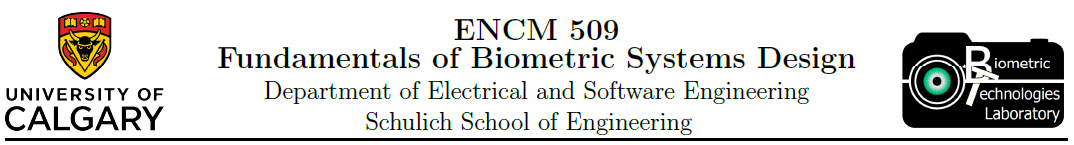

<center>
    <h1>Laboratory Experiment #8</h1>
    <h2>Face Recognition: Feature Extraction and Classification</h2>
    <h3>Youssef Abdel Maksoud, 30062891</h3>
</center>

In [5]:
import os, random
import matplotlib.pyplot as plt
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np

%matplotlib inline

r_seed = 101

# for reproducibility
# must to run this before create the BN! 
# Even in the cases where were changed the states names
gum.initRandom(r_seed) 
random.seed(r_seed)

# Introduction

The purpose of this laboratory exercise is to become familiar with the use of bayesian networks. Bayesian networks are acyclical graphs. In this lab, we will be observing the results of bayesian networks about the diamond princess cruise ship regaerding the probability of infection of illness. We will then perform inference to calclate posterior probabilities based on prior ones.

# Exercise 1

In [6]:
# fast create a BN (random paramaters are chosen)
bn1 = gum.fastBN('Winter->Influenza;' + 
                'Winter->Cold;' +
                'Influenza->Fever<-Cold')

bn1

(gum::BayesNet<double>@0x7fa9dc12b000) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

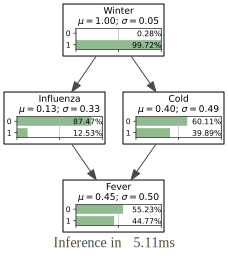

In [7]:
# Bayesian Network with random values
gnb.showInference(bn1)

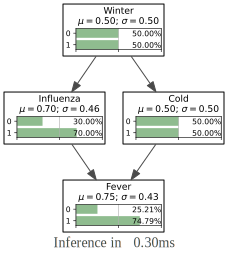

In [8]:
bn1.cpt('Winter')[:] = [0.5, 0.5]

bn1.cpt('Cold')[{'Winter':0}] = [0.8, 0.2]
bn1.cpt('Cold')[{'Winter':1}] = [0.2, 0.8]

bn1.cpt('Influenza')[{'Winter':0}] = [0.5, 0.5]
bn1.cpt('Influenza')[{'Winter':1}] = [0.1, 0.9]

bn1.cpt('Fever')[{'Influenza':0, 'Cold':0}] = [1.0, 0.0]
bn1.cpt('Fever')[{'Influenza':0, 'Cold':1}] = [0.1, 0.9]
bn1.cpt('Fever')[{'Influenza':1, 'Cold':0}] = [0.1, 0.9]
bn1.cpt('Fever')[{'Influenza':1, 'Cold':1}] = [0.01, 0.99]

# inference without evidences
gnb.showInference(bn1)

In [9]:
bn1.cpt('Fever')

(gum::Potential<double>@0x7fa9dfabbda0) <Fever:0|Influenza:0|Cold:0> :: 1 /<Fever:1|Influenza:0|Cold:0> :: 0 /<Fever:0|Influenza:1|Cold:0> :: 0.1 /<Fever:1|Influenza:1|Cold:0> :: 0.9 /<Fever:0|Influenza:0|Cold:1> :: 0.1 /<Fever:1|Influenza:0|Cold:1> :: 0.9 /<Fever:0|Influenza:1|Cold:1> :: 0.01 /<Fever:1|Influenza:1|Cold:1> :: 0.99

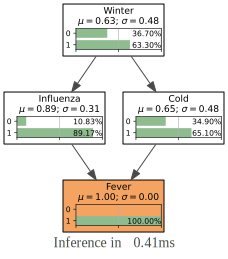

In [10]:
# evidence of Fever is True (1)
evidence = {'Fever': True}

# in PyAgrum two algorithms are available to do inference:
# - Lazy Propagation (default): gum.LazyPropagation(bn)
# - Variable Elimination: gum.VariableElimination(bn)
gnb.showInference(bn1, evs=evidence, engine=gum.LazyPropagation(bn1))

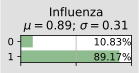

In [61]:
# calculate the updated value of prob. for Influenza
gnb.showPosterior(bn1, evidence, 'Influenza')

![exefcise 1](EX1.jpg)

The results of both the manual and network calculation are very similar.

# Exercise 2

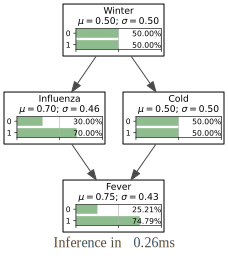

In [62]:
# no evidence
evidence = {}

# fast create a BN (random paramaters are chosen)
bn2 = gum.fastBN('Winter->Influenza;' + 
                'Winter->Cold;' +
                'Influenza->Fever<-Cold')

bn2.cpt('Winter')[:] = [0.5, 0.5]

bn2.cpt('Cold')[{'Winter':0}] = [0.8, 0.2]
bn2.cpt('Cold')[{'Winter':1}] = [0.2, 0.8]

bn2.cpt('Influenza')[{'Winter':0}] = [0.5, 0.5]
bn2.cpt('Influenza')[{'Winter':1}] = [0.1, 0.9]

bn2.cpt('Fever')[{'Influenza':0, 'Cold':0}] = [1.0, 0.0]
bn2.cpt('Fever')[{'Influenza':0, 'Cold':1}] = [0.1, 0.9]
bn2.cpt('Fever')[{'Influenza':1, 'Cold':0}] = [0.1, 0.9]
bn2.cpt('Fever')[{'Influenza':1, 'Cold':1}] = [0.01, 0.99]

# just to remind the BN
gnb.showInference(bn2, evs=evidence)

In [63]:
# Calculating the joint probability: Chain Rule
pICF = bn2.cpt('Influenza') * bn2.cpt('Cold') * bn2.cpt('Fever') * bn2.cpt('Winter')

# the result are all the possible scenarios
pICF

(gum::Potential<double>@0x7fde903b4fb0) <Winter:0|Cold:0|Influenza:0|Fever:0> :: 0.2 /<Winter:1|Cold:0|Influenza:0|Fever:0> :: 0.01 /<Winter:0|Cold:1|Influenza:0|Fever:0> :: 0.005 /<Winter:1|Cold:1|Influenza:0|Fever:0> :: 0.004 /<Winter:0|Cold:0|Influenza:1|Fever:0> :: 0.02 /<Winter:1|Cold:0|Influenza:1|Fever:0> :: 0.009 /<Winter:0|Cold:1|Influenza:1|Fever:0> :: 0.0005 /<Winter:1|Cold:1|Influenza:1|Fever:0> :: 0.0036 /<Winter:0|Cold:0|Influenza:0|Fever:1> :: 0 /<Winter:1|Cold:0|Influenza:0|Fever:1> :: 0 /<Winter:0|Cold:1|Influenza:0|Fever:1> :: 0.045 /<Winter:1|Cold:1|Influenza:0|Fever:1> :: 0.036 /<Winter:0|Cold:0|Influenza:1|Fever:1> :: 0.18 /<Winter:1|Cold:0|Influenza:1|Fever:1> :: 0.081 /<Winter:0|Cold:1|Influenza:1|Fever:1> :: 0.0495 /<Winter:1|Cold:1|Influenza:1|Fever:1> :: 0.3564

In [64]:
# In cases where Winter is "unknown" we can marginalize that variable
pICF = pICF.margSumOut(['Influenza'])
pICF.normalize()

(gum::Potential<double>@0x7fde903d7810) <Winter:0|Cold:0|Fever:0> :: 0.22 /<Winter:1|Cold:0|Fever:0> :: 0.019 /<Winter:0|Cold:1|Fever:0> :: 0.0055 /<Winter:1|Cold:1|Fever:0> :: 0.0076 /<Winter:0|Cold:0|Fever:1> :: 0.18 /<Winter:1|Cold:0|Fever:1> :: 0.081 /<Winter:0|Cold:1|Fever:1> :: 0.0945 /<Winter:1|Cold:1|Fever:1> :: 0.3924

In [65]:
# the 1,1,1 in pICF corresponds to Fever=1, Cold=1 and Winter=1
print('P(Fever = T, Cold = T, Winter = T): %.4f%%' % (pICF[1,1,1] * 100))

P(Fever = T, Cold = T, Winter = T): 39.2400%


![exefcise 1](EX2.jpg)

The network calculated a joint probability of .3924 while the manual calculation yielded a joint probability of .756.

# Exercise 3

The impact of not filling in all nodes of the susceptability CPT is that the network will not be precise. Since the child one of the node has 10 states, child two has 2 states and the node itself has 3 states, there should be 10x2x3 = 60 entries in the susceptability CPT.

# Exercise 4

In [66]:
# male, female
gender = [55, 45]

# stratified data from JIID's report, 2020: https://www.niid.go.jp/niid/en/2019-ncov-e/9417-covid-dp-fe-02.html
age = [16, 23, 347, 428, 334, 398, 923, 1015, 216, 11]
age_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']

In [67]:
bn = gum.fastBN('Age{0-9|10-19|20-29|30-39|40-49|50-59|60-69|70-79|80-89|90-99}->Susceptibility{low|medium|high};' +
                'Gender{male|female}->Susceptibility;')


gnb.sideBySide(bn, gnb.getInference(bn, size='30'))

G <!-- Age --> Age Age <!-- Susceptibility --> Susceptibility Susceptibility <!-- Age->Susceptibility --> Age->Susceptibility <!-- Gender --> Gender Gender <!-- Gender->Susceptibility --> Gender->Susceptibility


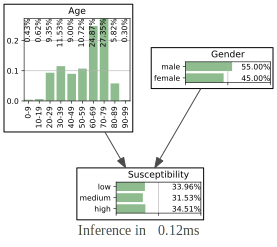

In [68]:
bn.cpt('Age')[:] = age / np.sum(age)
bn.cpt('Gender')[:] = gender / np.sum(gender)

# 0-9 yo, male: Susceptibility is 95% "low"
bn.cpt('Susceptibility')[{'Age':0, 'Gender':0}] = [.95, .05, .00]

# 0-9 yo, female: Susceptibility is 99% "low"
bn.cpt('Susceptibility')[{'Age':0, 'Gender':1}] = [.99, .01, .00]

# 90-99 yo, male: Susceptibility is 99% "high"
bn.cpt('Susceptibility')[{'Age':9, 'Gender':0}] = [.00, .01, .99]

# 90-99 yo, female: Susceptibility is 98% "high"
bn.cpt('Susceptibility')[{'Age':9, 'Gender':1}] = [.00, .02, .98]

# 40-49 yo, male: Susceptibility is 50% "high"
bn.cpt('Susceptibility')[{'Age':4, 'Gender':0}] = [.20, .30, .50]

# 40-49 yo, female: Susceptibility is 40% "medium"
bn.cpt('Susceptibility')[{'Age':4, 'Gender':1}] = [.30, .40, .30]

gnb.showInference(bn, size='30')

In [69]:
bn.cpt('Susceptibility')[:]

array([[[0.95      , 0.05      , 0.        ],
        [0.10417592, 0.55877786, 0.33704622],
        [0.01426796, 0.71780543, 0.26792661],
        [0.50484523, 0.08540797, 0.40974679],
        [0.2       , 0.3       , 0.5       ],
        [0.72232547, 0.10983337, 0.16784116],
        [0.26860427, 0.367978  , 0.36341773],
        [0.12269151, 0.54170578, 0.33560271],
        [0.24263609, 0.33899999, 0.41836392],
        [0.        , 0.01      , 0.99      ]],

       [[0.99      , 0.01      , 0.        ],
        [0.38342252, 0.29559407, 0.32098341],
        [0.32938525, 0.29186173, 0.37875303],
        [0.48287979, 0.29662914, 0.22049107],
        [0.3       , 0.4       , 0.3       ],
        [0.42053574, 0.20277918, 0.37668508],
        [0.39760293, 0.25138432, 0.35101275],
        [0.46199023, 0.09357543, 0.44443434],
        [0.49962467, 0.48460557, 0.01576976],
        [0.        , 0.02      , 0.98      ]]])

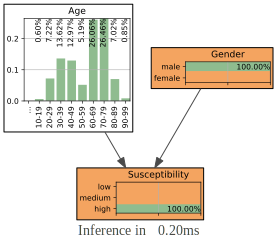

In [70]:
# considering a population of 80-89 years old, how susceptible they will be
evidence = {'Gender':0, 'Susceptibility':2}

ie = gum.LazyPropagation(bn)

ie.setEvidence(evidence)
ie.makeInference()

gnb.showInference(bn, size='10', evs=evidence)

In [71]:
res_age = ie.posterior('Age')
res_age

(gum::Potential<double>@0x7fde8ced9580) <Age:0-9> :: 0 /<Age:10-19> :: 0.00602232 /<Age:20-29> :: 0.0722257 /<Age:30-39> :: 0.13624 /<Age:40-49> :: 0.129737 /<Age:50-59> :: 0.0518953 /<Age:60-69> :: 0.260588 /<Age:70-79> :: 0.264629 /<Age:80-89> :: 0.0702028 /<Age:90-99> :: 0.00846007

In [72]:
res_age_a = res_age.toarray()
res_age_a
max_idx = np.argmax(res_age_a)
max_perc = res_age_a[max_idx]*100
max_age = age_labels[max_idx]
print('With HIGH susceptibility, the age [%s] is the most likely with %.2f%%' % (max_age, max_perc))

With HIGH susceptibility, the age [70-79] is the most likely with 26.46%


![exefcise 1](EX4.jpg)

Although both the manual calculation and the network predicted that the most likely age group is 70-79, the manual calculation yielded a probability significantly lower than that of the network. For the manual calculation, the values that were present in the susceptability CPT are used (defined by program).

# Conclusion

Throughout the lab, probabilites are calculated using both the network, as well as a manula calculation. Several times the manual calculation yielded different results than the network. Inference and joint probability is used throughout the exercises, as well as the incorporation of evidence while predicting inference. It is evident that when a CPT is not fully defined, the model becomes less precise.